<a href="https://colab.research.google.com/github/antonellafontanetto/DataScience/blob/main/K_Means_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **K-Means**

[K-Means//Clustering](https://realpython.com/k-means-clustering-python/)

K-means es un algoritmo de clustering no supervisado que se utiliza para agrupar datos similares en K grupos (o cl√∫steres). Es ampliamente usado en an√°lisis exploratorio de datos, compresi√≥n, segmentaci√≥n de clientes y reducci√≥n de dimensionalidad.

üîπ **¬øC√≥mo funciona K-means?**

* Elegir K (n√∫mero de cl√∫steres) que queremos formar.

* Inicializar K centroides (pueden ser aleatorios o usando m√©todos como K-means++ para mejorar la eficiencia).

* Asignar cada punto de datos al cl√∫ster m√°s cercano, es decir, al centroide con menor distancia (generalmente Euclidiana).

* Actualizar los centroides: se recalculan como la media de todos los puntos asignados a cada cl√∫ster.

* Repetir los pasos 3 y 4 hasta que:

* Los centroides no cambien (convergencia), o

* Se alcance un n√∫mero m√°ximo de iteraciones.

üîπ **¬øQu√© busca optimizar?**

K-means intenta minimizar la suma de las distancias cuadradas entre cada punto y el centroide de su cl√∫ster. Esta m√©trica se llama inercia o Within-Cluster Sum of Squares (WCSS).

üîπ **Ventajas**

* R√°pido y eficiente en grandes vol√∫menes de datos.

* F√°cil de implementar y entender.

* Escalable a datasets grandes.

üîπ **Desventajas**

* Requiere especificar K previamente.

* Puede converger a m√≠nimos locales.

* No maneja bien cl√∫steres de formas no esf√©ricas o de tama√±o desigual.

* Sensible a outliers y a la inicializaci√≥n de centroides.

üîπ **Aplicaciones comunes**

* Segmentaci√≥n de clientes.

* Compresi√≥n de im√°genes (por colores).

* Detecci√≥n de patrones en datos no etiquetados.

* Agrupamiento de documentos o textos similares.

In [4]:
import matplotlib.pyplot as plt

import sys

!{sys.executable} -m pip install kneed

import numpy as np

import pandas as pd

from kneed import KneeLocator

from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler

Los algoritmos de aprendizaje autom√°tico no deterministas, como k -medias, son dif√≠ciles de reproducir. El random_state par√°metro se establece en un valor entero para que pueda seguir los datos presentados en el tutorial. En la pr√°ctica, es mejor dejar random_state el valor predeterminado None.

In [5]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [21]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [6]:
true_labels[:5]

array([1, 0, 2, 2, 2])

El proceso de transformar caracter√≠sticas num√©ricas para usar la misma escala se conoce como escalado de caracter√≠sticas . Es un paso importante del preprocesamiento de datos para la mayor√≠a de los algoritmos de aprendizaje autom√°tico a distancia, ya que puede tener un impacto significativo en el rendimiento del algoritmo.

En este ejemplo, usar√° la StandardScalerclase . Esta clase implementa un tipo de escalado de caracter√≠sticas llamado estandarizaci√≥n . La estandarizaci√≥n escala, o desplaza, los valores de cada caracter√≠stica num√©rica del conjunto de datos para que tengan una media de 0 y una desviaci√≥n est√°ndar de 1:

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

La KMeansclase estimador de scikit-learn es donde se establecen los par√°metros del algoritmo antes de ajustar el estimador a los datos. La implementaci√≥n de scikit-learn es flexible y ofrece varios par√°metros ajustables.

Estos son los par√°metros utilizados en este ejemplo:

* initControla la t√©cnica de inicializaci√≥n. La versi√≥n est√°ndar del algoritmo k -means se implementa estableciendo initen "random". Al establecerlo en , "k-means++"se emplea un truco avanzado para acelerar la convergencia, que usar√° m√°s adelante.

* n_clustersEstablece k para el paso de agrupamiento. Este es el par√°metro m√°s importante para k -medias.

* n_initEstablece el n√∫mero de inicializaciones a realizar. Esto es importante porque dos ejecuciones pueden converger en diferentes asignaciones de cl√∫ster. El comportamiento predeterminado del algoritmo scikit-learn es realizar diez ejecuciones de k -medias y devolver los resultados de la que tenga el SSE m√°s bajo.

* max_iterEstablece el n√∫mero m√°ximo de iteraciones para cada inicializaci√≥n del algoritmo k -means.

In [9]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

Las estad√≠sticas de la ejecuci√≥n de inicializaci√≥n con el SSE m√°s bajo est√°n disponibles como atributos kmeansdespu√©s de llamar .fit():

In [10]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [11]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [12]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [13]:
# The number of iterations required to converge
kmeans.n_iter_

10

Finalmente, las asignaciones de cl√∫ster se almacenan como una matriz unidimensional de NumPy en kmeans.labels_. A continuaci√≥n, se muestran las primeras cinco etiquetas predichas:

In [14]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

### **M√©todo del codo**

Para aplicar el m√©todo del codo , ejecute varias k -medias, increm√©ntelas kcon cada iteraci√≥n y registre la SSE:

In [15]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

Al graficar la SSE en funci√≥n del n√∫mero de conglomerados, observe que la SSE contin√∫a disminuyendo a medida que aumenta k. A medida que se agregan m√°s centroides, la distancia de cada punto a su centroide m√°s cercano disminuye.

Existe un punto √≥ptimo donde la curva SSE comienza a curvarse, conocido como el punto de inflexi√≥n . Se considera que el valor x de este punto representa un equilibrio razonable entre el error y el n√∫mero de cl√∫steres. En este ejemplo, el punto de inflexi√≥n se encuentra en x=3:

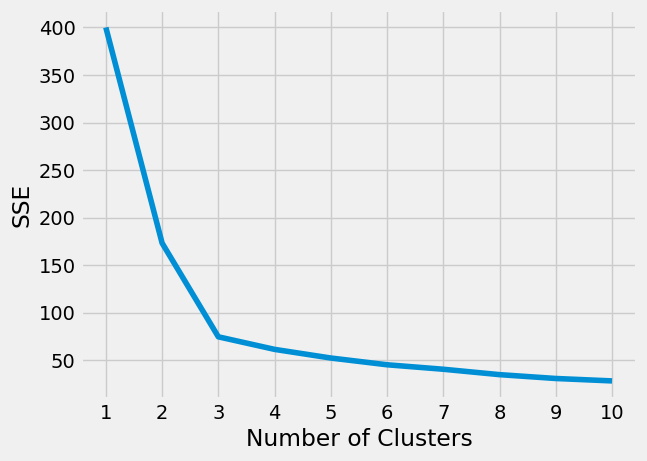

In [17]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Determinar el punto de inflexi√≥n en la curva SSE no siempre es sencillo. Si tiene dificultades para elegirlo, puede usar el paquete de Python kneed para identificarlo program√°ticamente:

In [18]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

np.int64(3)

### **M√©todo de Silueta**

El coeficiente de silueta mide la cohesi√≥n y separaci√≥n de los cl√∫steres. Cuantifica el grado de ajuste de un punto de datos a su cl√∫ster asignado en funci√≥n de dos factores:

Qu√© tan cerca est√° el punto de datos de otros puntos del cl√∫ster
Qu√© tan lejos est√° el punto de datos de los puntos de otros grupos
Los valores del coeficiente de silueta oscilan entre -1y 1. Los valores mayores indican que las muestras est√°n m√°s cerca de sus conglomerados que de otros conglomerados.

En la implementaci√≥n del coeficiente de silueta en scikit-learn , el coeficiente de silueta promedio de todas las muestras se resume en una sola puntuaci√≥n. La silhouette score()funci√≥n requiere un m√≠nimo de dos cl√∫steres; de lo contrario, generar√° una excepci√≥n.

In [19]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

En √∫ltima instancia, su decisi√≥n sobre la cantidad de cl√∫steres a utilizar debe guiarse por una combinaci√≥n de conocimiento del dominio y m√©tricas de evaluaci√≥n de agrupamiento.

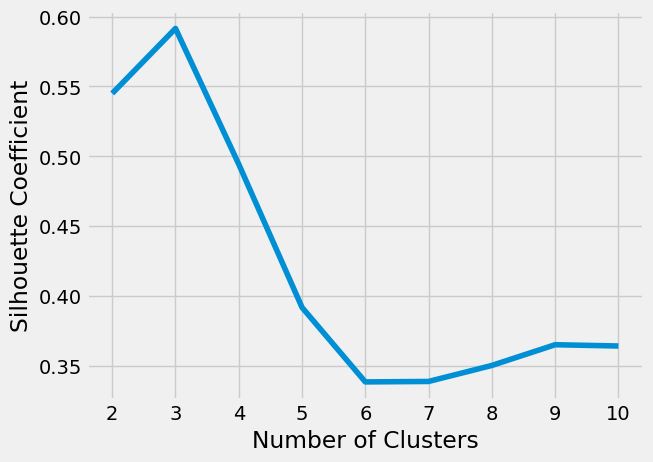

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# **DBSCAN**

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

Esta vez, utilice make_moons()para generar datos sint√©ticos en forma de medialunas:

In [22]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [23]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

Imprimir el coeficiente de silueta de cada uno de los dos algoritmos y comp√°relos. Un coeficiente de silueta m√°s alto sugiere mejores cl√∫steres, lo cual es enga√±oso en este escenario:

In [24]:
kmeans_silhouette

np.float64(0.5)

In [25]:
dbscan_silhouette

np.float64(0.38)

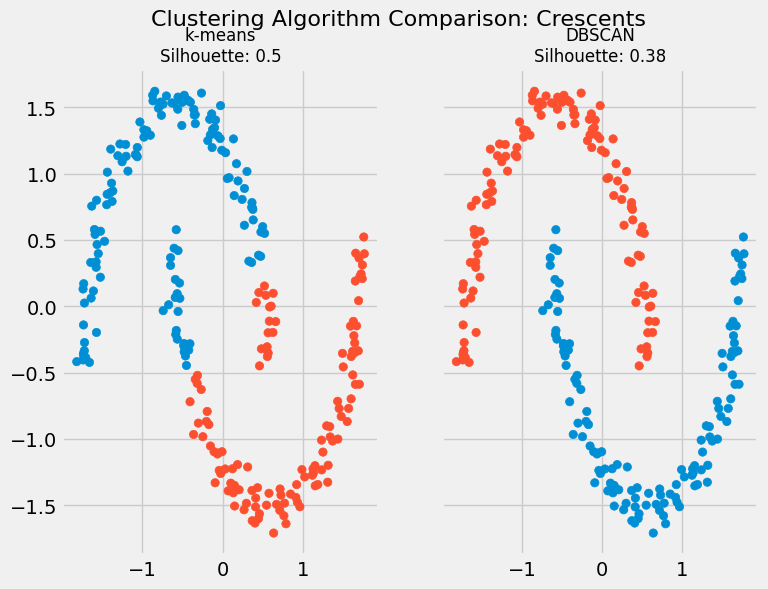

In [26]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

Dado que se conocen las etiquetas de la verdad fundamental, es posible utilizar una m√©trica de agrupamiento que las considere en su evaluaci√≥n. Se puede usar la implementaci√≥n en scikit-learn de una m√©trica com√∫n llamada √≠ndice rand ajustado (ARI) . A diferencia del coeficiente de silueta, el ARI utiliza asignaciones de cl√∫steres reales para medir la similitud entre las etiquetas verdaderas y las predichas.

In [27]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [28]:
round(ari_kmeans, 2)

0.47

In [29]:
round(ari_dbscan, 2)

1.0

Los valores de salida de ARI oscilan entre -1y 1. Una puntuaci√≥n cercana a 0.0indica asignaciones aleatorias, y una puntuaci√≥n cercana a 1indica cl√∫steres perfectamente etiquetados.

Seg√∫n el resultado anterior, se puede observar que el coeficiente de silueta era enga√±oso. ARI muestra que DBSCAN es la mejor opci√≥n para el ejemplo de las medias sint√©ticas en comparaci√≥n con k -medias.

Existen varias m√©tricas que eval√∫an la calidad de los algoritmos de agrupamiento. Revisar las implementaciones en scikit-learn le ayudar√° a seleccionar la m√©trica de evaluaci√≥n de agrupamiento adecuada.